# 6.4 Supervised Machine Learning

## 1. Import libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Define path

path = r'C:\Users\paulo\OneDrive\USA Education\Career Foundry\Data Analysis\Modulo 07 - Dashboard\Flavors of Cacao Project'

In [11]:
# Import data

df_flavors_cacao = pd.read_csv(os.path.join(path, '02 - Data', 'Prepare data', 'flavors_of_cacao_rating_category.csv'), index_col = False)

## 2. Clean data

#### Data was already cleaned and checked in previous exercises

In [61]:
# Checking data type and column names

df_flavors_cacao.dtypes

company_name             object
origin_bean_bar_name     object
REF                       int64
review_year               int64
cocoa_percent            object
company_location         object
rating                  float64
bean_type                object
bean_country_origin      object
rating_category          object
dtype: object

## 3. Prep data Regression analysis

#### Scatterplot

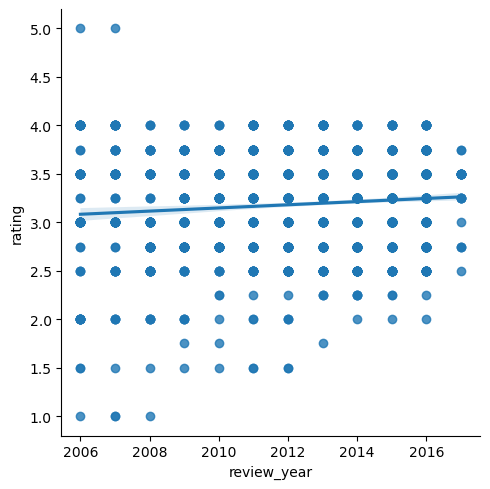

In [13]:
# Create a scatterplot for the "review_year" and "rating" columns in seaborn

sns.lmplot(x = 'review_year', y = 'rating', data = df_flavors_cacao)

#### Hypothesis: As the year passes by (increase) chocolates receive a better rating (increase). 

In [14]:
# Reshape the variables we need into numpy arrays and put then into separate objects

X = df_flavors_cacao['review_year'].values.reshape(-1,1)
y = df_flavors_cacao['rating'].values.reshape(-1,1)

In [15]:
X

array([[2016],
       [2015],
       [2015],
       ...,
       [2011],
       [2011],
       [2010]], dtype=int64)

In [16]:
# Split data into train set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

#### Training data

In [17]:
# Create a regression object

regression = LinearRegression() #Training set

In [18]:
# Fit the regression to the trais set

regression.fit(X_train, y_train)

LinearRegression()

#### Test data

In [19]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

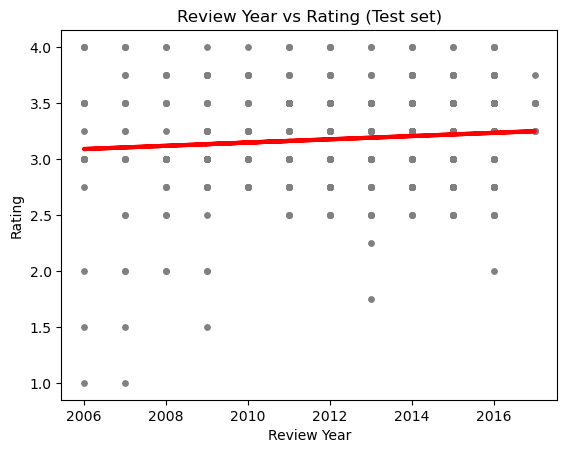

In [20]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Review Year vs Rating (Test set)')
plot_test.xlabel('Review Year')
plot_test.ylabel('Rating')
plot_test.show()

In [21]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0144835]]
Mean squared error:  0.21048099367702439
R2 score:  0.013677670310634493


#### From this 1st scatterplot we can see that there is no relationship between the Rating and Year, based on the MSE ~0.21 is a quite large number when we think in between 0 and 5. Besides, the R2 score shows a very low indicative of correlation, 1%. 

In [23]:
y_predicted

array([[3.13159648],
       [3.13159648],
       [3.23298096],
       [3.17504697],
       [3.21849747],
       [3.17504697],
       [3.23298096],
       [3.11711298],
       [3.17504697],
       [3.20401397],
       [3.23298096],
       [3.16056347],
       [3.17504697],
       [3.20401397],
       [3.20401397],
       [3.17504697],
       [3.10262948],
       [3.13159648],
       [3.21849747],
       [3.18953047],
       [3.21849747],
       [3.21849747],
       [3.13159648],
       [3.11711298],
       [3.23298096],
       [3.11711298],
       [3.10262948],
       [3.16056347],
       [3.14607998],
       [3.17504697],
       [3.21849747],
       [3.17504697],
       [3.23298096],
       [3.18953047],
       [3.17504697],
       [3.17504697],
       [3.21849747],
       [3.13159648],
       [3.20401397],
       [3.23298096],
       [3.14607998],
       [3.16056347],
       [3.17504697],
       [3.11711298],
       [3.20401397],
       [3.10262948],
       [3.21849747],
       [3.218

In [24]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.50,3.131596
1,2.75,3.131596
2,2.50,3.232981
3,3.25,3.175047
4,3.25,3.218497
5,2.75,3.175047
6,3.50,3.232981
7,2.50,3.117113
8,3.50,3.175047
9,3.50,3.204014


#### Compare how the regression fits the training set 

In [25]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0144835]]
Mean squared error:  0.23295388171466028
R2 score:  0.007612135862142266


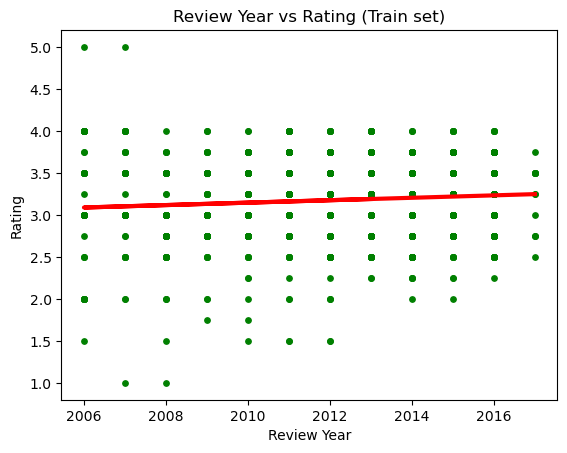

In [28]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Review Year vs Rating (Train set)')
plot_test.xlabel('Review Year')
plot_test.ylabel('Rating')
plot_test.show()

#### Similar results were seen using the training data as to test the hypothese. 

#### Bonus: performance improvement after removing outliers

In [48]:
# Clean the extreme values from the "Rating" variable observed during the consistency checks.

df_test = df_flavors_cacao[df_flavors_cacao['rating'] > 1.5] 

In [49]:
df_test2 = df_test[df_test['rating'] <= 4.5] 

In [50]:
df_test2['rating'].value_counts(dropna = False)

rating
3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    127
4.00     98
2.00     32
2.25     14
1.75      3
Name: count, dtype: int64

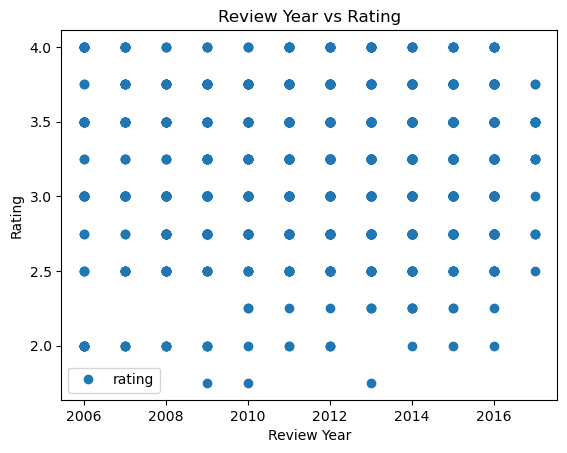

In [51]:
# See how the scatterplot looks without outliers.

df_test2.plot(x = 'review_year', y='rating', style='o')  
plt.title('Review Year vs Rating')  
plt.xlabel('Review Year')  
plt.ylabel('Rating')  
plt.show()

In [52]:
# Reshape again.

X_2 = df_test2['review_year'].values.reshape(-1,1)
y_2 = df_test2['rating'].values.reshape(-1,1)

In [53]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [54]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [55]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [56]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [57]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01094593]]
Mean squared error:  0.17984469499227343
R2 score:  0.0025967645583044874


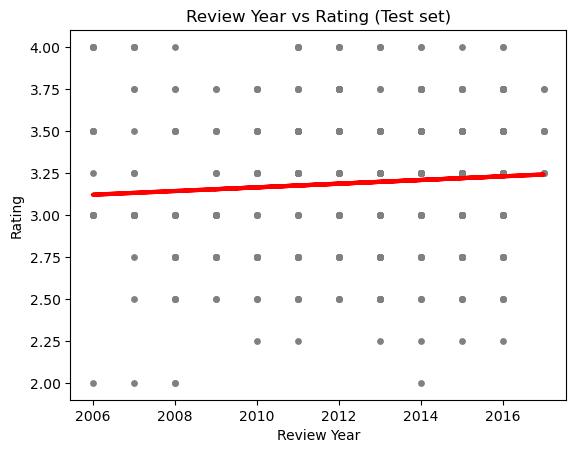

In [58]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Review Year vs Rating (Test set)')
plot_test.xlabel('Review Year')
plot_test.ylabel('Rating')
plot_test.show()

In [59]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,2.50,3.153063
1,3.25,3.229685
2,2.75,3.153063
3,3.25,3.218739
4,3.75,3.164009
5,3.00,3.164009
6,3.50,3.207793
7,2.75,3.229685
8,3.50,3.207793
9,2.75,3.142117


## 5. Conclusion

#### My first instinct was think that as time passes by, the chocolates would become better, therefore, increase the rating. Based on this exercise, it is possible to rule out this hypothese. Removing the outliers did not have any difference on the results, neither using the training data set for the predict analysis. 

#### At the end, Ratings are not more than subjectives analysis of whoever were the judges. As a result, we can see mixed ratings independently of the year.  